In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [7]:
data = pd.read_csv('./data/DMV_Written_Tests.csv')
data.head()


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [531]:
scores = np.array(data[['DMV_Test_1', 'DMV_Test_2']].values)
results = np.array(data[['Results']])

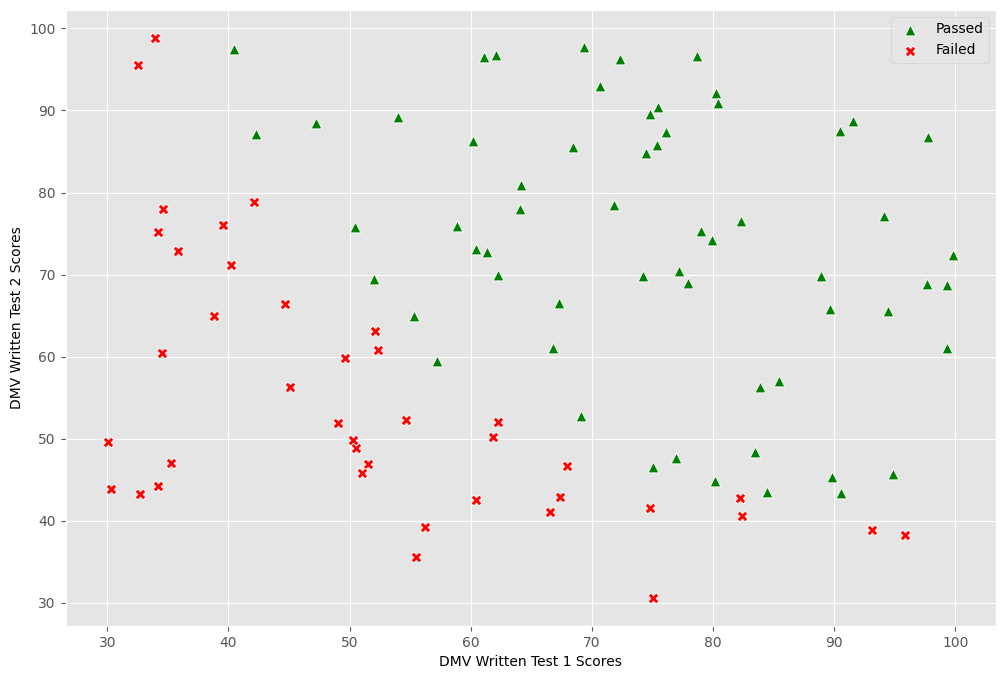

In [532]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0], # choosing the passed indicies of the first test
                     y = scores[passed[:, 0], 1], # choosing the passed indicies of the second test
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0], # choosing the failed indicies of the first test
                y = scores[failed[:, 0], 1], # choosing the failed indicies of the first test
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show()

### Sigmoid Function

The sigmoid function, also known as the logistic function, is a non-linear activation function commonly used in logistic regression and neural networks. It takes a real number as input and outputs a value between 0 and 1, representing the probability of an event occurring. The sigmoid function is defined as:

$$σ(z) = \frac{1}{1 + e^{-z}}$$

where:

* z is the input to the sigmoid function

### Purpose of the Sigmoid Function

The sigmoid function is a crucial component of logistic regression, as it transforms the linear combination of input features into a probability between 0 and 1. This allows the model to predict the probability of a binary outcome, such as whether an email is spam or not.

In addition to logistic regression, the sigmoid function is also used in neural networks as an activation function for hidden layers (not recommended due to saturation). It helps introduce non-linearity into the network, enabling it to model complex relationships between inputs and outputs.

### Properties of the Sigmoid Function

The sigmoid function exhibits several useful properties that make it suitable for machine learning applications:

1. **Output Range:** The sigmoid function always outputs a value between 0 and 1, which is particularly useful for modeling binary outcomes or probabilities.

2. **Smooth Activation:** The sigmoid function produces a smooth transition between 0 and 1, allowing for gradual changes in the output as the input changes.

3. **Differentiable Function:** The sigmoid function is differentiable, meaning its derivative can be calculated. This property is essential for optimization algorithms like gradient descent, which rely on gradient information to update model parameters.



In [533]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

sigmoid_function(0.2)

0.549833997312478

### Cost Function for Logistic Regression
The cost function for logistic regression, also known as binary cross-entropy loss, measures the difference between the predicted probabilities and the actual binary labels. It is defined as follows:

$$J(θ) = - \frac{1}{m} \sum_{i=1}^{m} (y_i \log(h_{\theta}(x_i)) + (1 - y_i) \log(1 - h_{\theta}(x_i)))$$

where:

* $J(θ)$ is the cost function, which represents the average cross-entropy between the predicted probabilities and the true labels
* $m$ is the number of training examples
* $y_i$ is the true label for the i-th training example, which can be either 0 or 1
* $h_{\theta}(x_i)$ is the predicted probability for the i-th training example, which is a value between 0 and 1
* $\log(h_{\theta}(x_i))$ is the log of the predicted probability, which is a non-negative value
* $\log(1 - h_{\theta}(x_i))$ is the log of 1 minus the predicted probability, which is also a non-negative value

The cost function is minimized by adjusting the weights of the logistic regression model using an optimization algorithm, such as gradient descent. The goal of minimizing the cost function is to make the predicted probabilities closer to the true labels.


### Gradient of the Cost Function for Logistic Regression

The gradient of the cost function for logistic regression, also known as binary cross-entropy loss, measures the direction of steepest ascent of the cost function. It is defined as follows:

$$ \nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x_i) - y_i) x_i $$

where:

* $ \nabla J(\theta)$ is the gradient of the cost function, which is a vector of partial derivatives of the cost function with respect to each weight
* $ h_{\theta}(x_i)$ is the predicted probability for the i-th training example, which is a value between 0 and 1
* $ y_i$ is the true label for the i-th training example, which can be either 0 or 1
* $ x_i$ is the i-th training example, which is a vector of features

The gradient is used to update the weights of the logistic regression model using an optimization algorithm, such as gradient descent. The goal of using the gradient is to find the direction in which the cost function decreases the most rapidly.

In [534]:
def compute_cost_and_gradient(theta, x, y):
    m = len(y)
    y_pred = sigmoid_function(np.dot(x, theta)) # 100x3 * 3x1 = 100x1
    error = (y * np.log(y_pred)) + (1 - y) * np.log(1 - y_pred) # if the actual label is 1 the left side will be activated and vice versa # y shape is 100x1
    cost = -1 / m * np.sum(error) # calculating the loss
    gradient = 1 / m * (x.T.dot((y_pred-y))) # claculating the gradient to update the weights # 3x100 * 100x1
    return cost, gradient

## Standardization The Data
<b>Standardization</b> is a technique for scaling numerical data to have a mean of zero and a standard deviation of one, as it can help to improve the performance of the algorithms.

| Feature	     |               Standardization	                                    |               Normalization |
|----------------|----------------------------------------------------------------------|---------------------------------|
| Goal	     |   Scale data to have a mean of zero and a standard deviation of one	|    Scale data to a specific range |
| Method	     |   Subtract the mean and divide by the standard deviation	            |    Apply a linear transformation |
| Examples	 |   Z-score normalization, min-max normalization	                    |    Decimal scaling, feature scaling |


In [535]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
stand_scores = (scores - mean_scores) / std_scores
print(f'Before standardization :\n {scores[0:4]} \n\n After standardization :\n {stand_scores[0:4]}')


Before standardization :
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]] 

 After standardization :
 [[-1.60224763  0.63834112]
 [-1.82625564 -1.2075414 ]
 [-1.53903969  0.3612943 ]
 [-0.28210129  1.0863683 ]]


In [536]:
np.random.seed(1)
rows = stand_scores.shape[0] # 100
cols = stand_scores.shape[1] # 2

x = np.append(0.8 * np.random.random((rows, 1)) - 1, stand_scores, axis=1) # 100x1 and 100x2 # intercept term or the bias term
y = results.reshape(rows,1)
print(f'inputs example: {x[2]}\ntrue labels example: {y[2]}')


inputs example: [-0.9999085  -1.53903969  0.3612943 ]
true labels example: [0]


## Theta, Cost and Gradient initializations

In [537]:
np.random.seed(1)
theta = 0.2 * (np.random.random((cols + 1, 1)) - 0.1) # 3x1
cost, gradient = compute_cost_and_gradient(theta, x, y)
print(f'Theta value is:\n {theta}')
print(f'Cost value is: {cost}')
print(f'Gradient value is:\n {gradient}')

Theta value is:
 [[ 0.0634044 ]
 [ 0.1240649 ]
 [-0.01997713]]
Cost value is: 0.6690027685359746
Gradient value is:
 [[ 0.06247424]
 [-0.25028241]
 [-0.25657368]]


In [538]:
def train(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost_and_gradient(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

theta, costs = train(x, y, theta, 1, 200)
print(f'Resulting theta is\n {theta}')
print(f'Resulting cost is {costs[-1]}')


Resulting theta is
 [[-2.06610832]
 [ 3.48465915]
 [ 3.2822004 ]]
Resulting cost is 0.21130426278758307


Text(0.5, 1.0, 'Values of Cost Function over iterations of Gradient Descent')

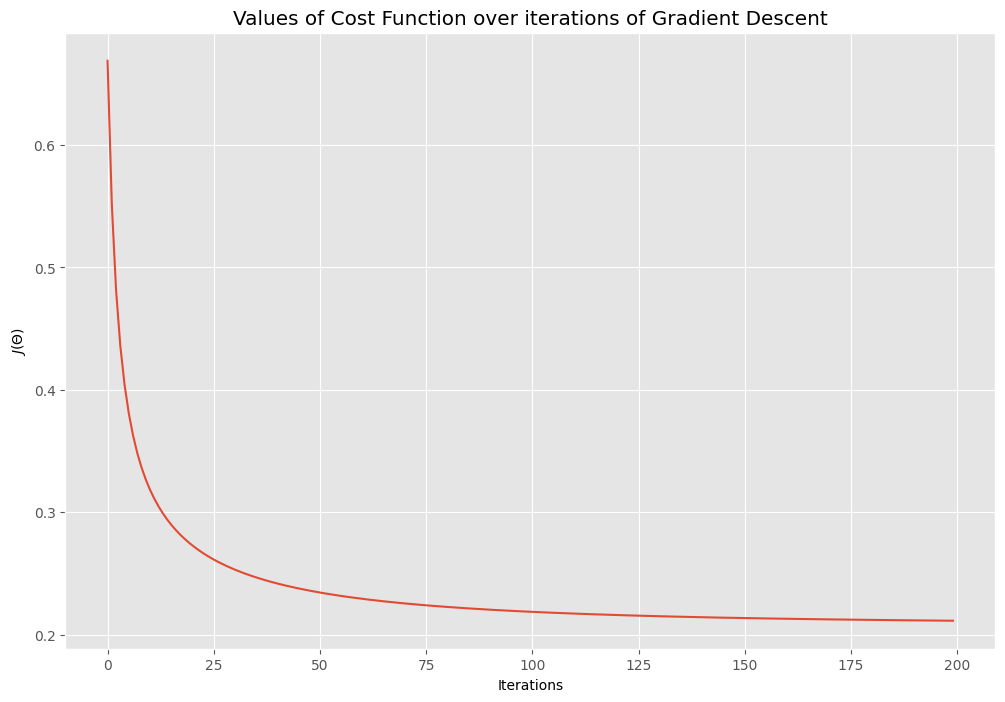

In [539]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent")

In [540]:
def predict(x, theta):
    results = np.dot(x, theta)
    return results > 0
p = predict(x, theta)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 91 %


In [545]:
np.random.seed(1)
test_x_raw = np.array([[55, 80],
                       [30, 20],
                       [53, 66],
                       [58, 77],
                       [66, 66],
                       [60, 60],
                       [70, 74],
                       [58, 80],
                       [100, 100]])
test_x = (test_x_raw - mean_scores) / std_scores # Applying the standarization
test_x = np.append(0.8 * np.random.random((len(test_x_raw), 1)) - 1, test_x, axis=1) 
prediction = sigmoid_function(np.dot(test_x, theta))
for pred in range(len(prediction)):
    print(f"A person who scores {test_x_raw[pred][0]} and {test_x_raw[pred][1]} on their DMV written tests have a {np.round(prediction[pred][0], 2)} chance to pass the test")

A person who scores 55 and 80 on their DMV written tests have a 0.87 chance to pass the test
A person who scores 30 and 20 on their DMV written tests have a 0.0 chance to pass the test
A person who scores 53 and 66 on their DMV written tests have a 0.44 chance to pass the test
A person who scores 58 and 77 on their DMV written tests have a 0.89 chance to pass the test
A person who scores 66 and 66 on their DMV written tests have a 0.86 chance to pass the test
A person who scores 60 and 60 on their DMV written tests have a 0.45 chance to pass the test
A person who scores 70 and 74 on their DMV written tests have a 0.98 chance to pass the test
A person who scores 58 and 80 on their DMV written tests have a 0.93 chance to pass the test
A person who scores 100 and 100 on their DMV written tests have a 1.0 chance to pass the test
